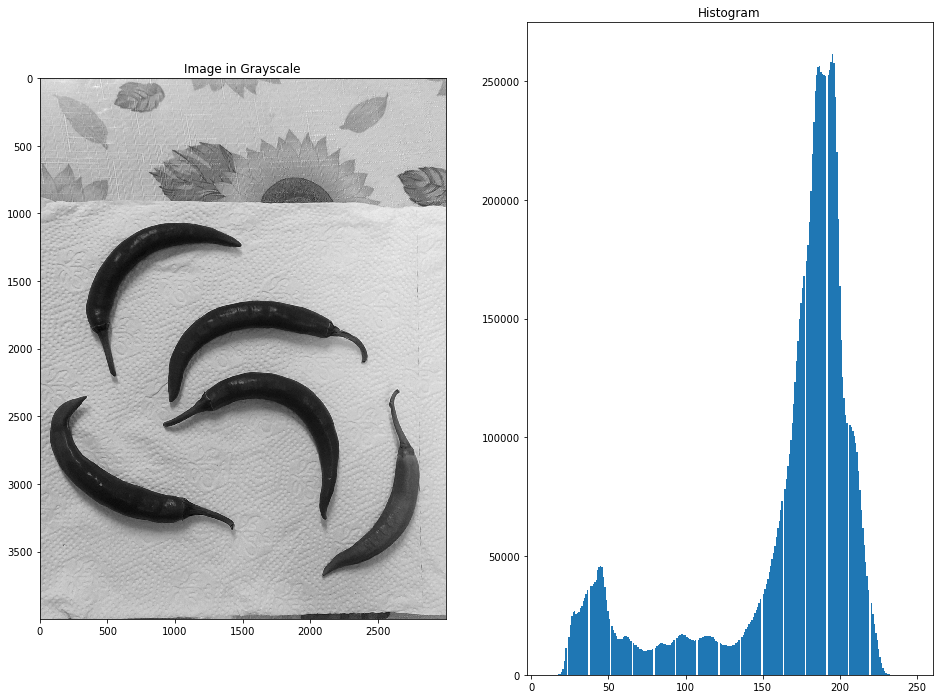

In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('G-Cili-5.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 12))

plt.subplot(121)
plt.title("Image in Grayscale")
plt.imshow(gray, cmap='gray')

plt.subplot(122)
plt.title("Histogram")
plt.hist(gray.ravel(), 256)

plt.show()

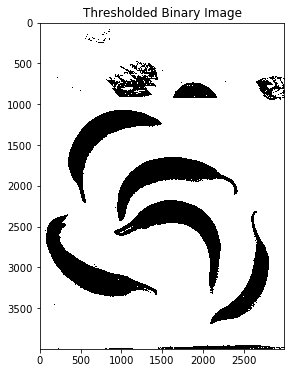

Min: 0
Max: 255


In [11]:
ret, global_thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)
ret, otsu_thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

thresh = otsu_thresh

plt.figure(figsize=(8, 6))
plt.title("Thresholded Binary Image")
plt.imshow(thresh, cmap='gray')
plt.show()

print("Min: " + str(np.min(thresh)))
print("Max: " + str(np.max(thresh)))

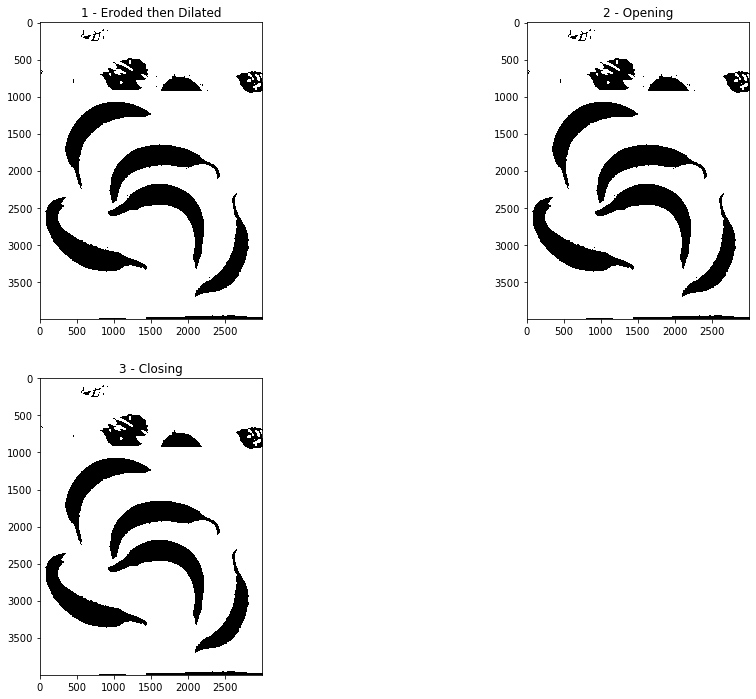

In [12]:
# Noise Removal
kernel = np.ones((3, 3), np.uint8)

erosion = cv.erode(thresh, kernel, iterations=9)
dilated = cv.dilate(erosion, kernel, iterations=9)
opening = cv.morphologyEx(dilated, cv.MORPH_OPEN, kernel, iterations=2)
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel, iterations=2)

plt.figure(figsize=(16, 12))

plt.subplot(221)
plt.title("1 - Eroded then Dilated")
plt.imshow(dilated, cmap='gray')

plt.subplot(222)
plt.title("2 - Opening")
plt.imshow(opening, cmap='gray')

plt.subplot(223)
plt.title("3 - Closing")
plt.imshow(closing, cmap='gray')

plt.show()

final = closing

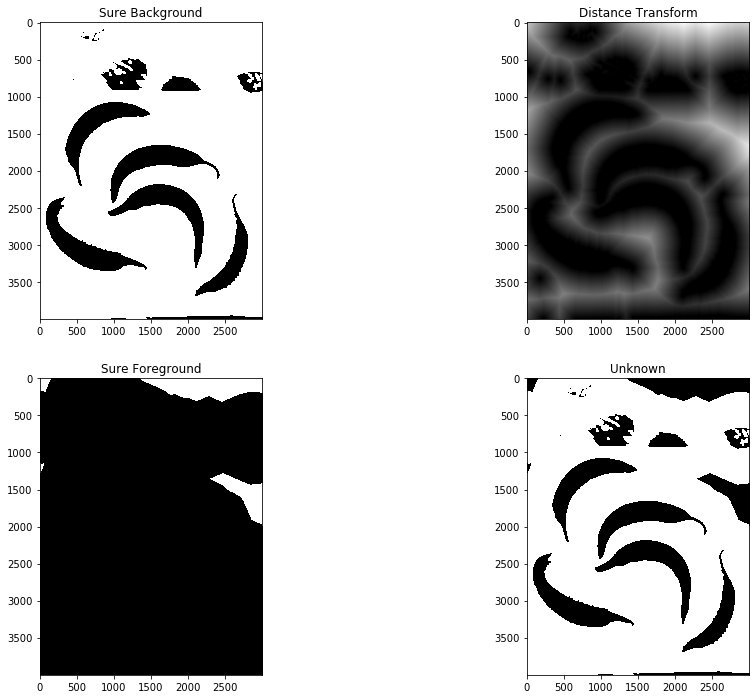

In [13]:
sure_bg = cv.dilate(final, kernel, iterations=3)

dist_transform = cv.distanceTransform(final, cv.DIST_L2, 3)
ret, sure_fg = cv.threshold(dist_transform, 0.6*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

plt.figure(figsize=(16, 12))

plt.subplot(221)
plt.title("Sure Background")
plt.imshow(sure_bg, cmap='gray')

plt.subplot(222)
plt.title("Distance Transform")
plt.imshow(dist_transform, cmap='gray')

plt.subplot(223)
plt.title("Sure Foreground")
plt.imshow(sure_fg, cmap='gray')

plt.subplot(224)
plt.title("Unknown")
plt.imshow(unknown, cmap='gray')

plt.show()

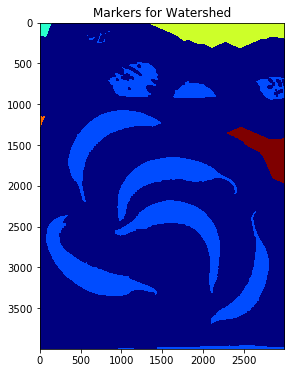

In [14]:
ret, markers = cv.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

plt.figure(figsize=(8, 6))
plt.title("Markers for Watershed")
plt.imshow(markers, cmap='jet')
plt.show()

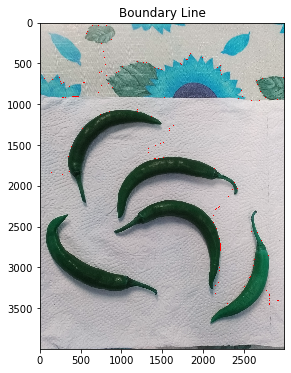

In [15]:
markers = cv.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

plt.figure(figsize=(8, 6))
plt.title("Boundary Line")
plt.imshow(img)
plt.show()